### Student: Graciele Maria Ludwig            
Setember/2024

#### Dataset: https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)
#### License for use: https://creativecommons.org/licenses/by/4.0/legalcode

#### For what purpose was the dataset created?

" The National Poll on Healthy Aging dataset was created to gather insights on the health, healthcare, 
and health policy issues affecting Americans aged 50 and older. By focusing on the perspectives of older
adults and their caregivers, the University of Michigan aimed to inform the public, healthcare providers,
policymakers, and advocates about the various aspects of aging. This includes topics like health insurance, 
household composition, sleep issues, dental care, prescription medications, and caregiving, thereby providing 
a comprehensive understanding of the health-related needs and concerns of the older population (archive.ics.uci.edu, n.d.)."




In [23]:
# import libraries for manipulating the data
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

C:\Users\graci\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
health = pd.read_csv("healthy_aging.csv")   # use pandas to read the csv file

In [4]:
health.head()    # check head of dataset, the first five rows 

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


## Adicional Variable Information

#### Class Labels

Number of Doctors Visited: The total count of different doctors the patient has seen = {
 1: 0-1 doctors
 2: 2-3 doctors
 3: 4 or more doctors
}

Age: The patient's age group = {
 1: 50-64
 2: 65-80
}

Physical Health: A self-assessment of the patient's physical well-being = {
 -1: Refused 
 1: Excellent 
 2: Very Good 
 3: Good
 4: Fair
 5: Poor
}

Mental Health: A self-evaluation of the patient's mental or psychological health = {
 -1: Refused 
 1: Excellent 
 2: Very Good 
 3: Good
 4: Fair
 5: Poor
}

Dental Health: A self-assessment of the patient's oral or dental health= {
 -1: Refused 
 1: Excellent 
 2: Very Good 
 3: Good
 4: Fair
 5: Poor
}

Employment: The patient's employment status or work-related information = {
 -1: Refused 6
 1: Working full-time
 2: Working part-time
 3: Retired
 4: Not working at this time
}

Stress Keeps Patient from Sleeping: Whether stress affects the patient's ability to sleep = {
 0: No
 1: Yes
}

Medication Keeps Patient from Sleeping: Whether medication impacts the patient's sleep = {
 0: No
 1: Yes
}

Pain Keeps Patient from Sleeping: Whether physical pain disturbs the patient's sleep = {
 0: No
 1: Yes
}

Bathroom Needs Keeps Patient from Sleeping: Whether the need to use the bathroom affects the patient's sleep = {
 0: No
 1: Yes
}

Unknown Keeps Patient from Sleeping: Unidentified factors affecting the patient's sleep = {
 0: No
 1: Yes
}

Trouble Sleeping: General issues or difficulties the patient faces with sleeping = {
 0: No
 1: Yes
}

Prescription Sleep Medication: Information about any sleep medication prescribed to the patient = {
 -1: Refused
 1: Use regularly
 2: Use occasionally
 3: Do not use
}

Race: The patient's racial or ethnic background = {
 -2: Not asked
 -1: REFUSED
 1: White, Non-Hispanic
 2: Black, Non-Hispanic
 3: Other, Non-Hispanic
 4: Hispanic
 5: 2+ Races, Non-Hispanic
}
Gender: The gender identity of the patient = {
 -2: Not asked
 -1: REFUSED
 1: Male
 2: Female
}

In [9]:
health.shape

(714, 15)

In [14]:
health.dtypes     # check data type 

Number of Doctors Visited                     int64
Age                                           int64
Phyiscal Health                               int64
Mental Health                                 int64
Dental Health                                 int64
Employment                                    int64
Stress Keeps Patient from Sleeping            int64
Medication Keeps Patient from Sleeping        int64
Pain Keeps Patient from Sleeping              int64
Bathroom Needs Keeps Patient from Sleeping    int64
Uknown Keeps Patient from Sleeping            int64
Trouble Sleeping                              int64
Prescription Sleep Medication                 int64
Race                                          int64
Gender                                        int64
dtype: object

In [11]:
health.info()    # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient from Sleeping    

In [25]:
duplicates = health.duplicated()   # check for duplicates,its also posible select specific columns:  duplicates = health.duplicated(subset=['Gender', 'Age'])

In [26]:
health["Phyiscal Health"].unique() # information about a specific atribute

array([ 4,  3,  2,  5,  1, -1], dtype=int64)

In [28]:
health.describe()   # statistical information

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


<AxesSubplot:ylabel='Count'>

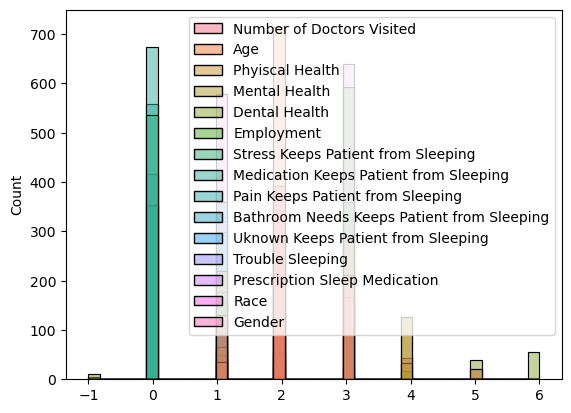

In [27]:
sns.histplot(data=health)

In [32]:
# Creating the heatmap to visualize correlation between variables
plt.figure(figsize=(10, 8))      #set figure size
sns.heatmap(health)

plt.show()

TypeError: 'module' object is not callable

In [ ]:
#adding columns to a dataset  (1= condition true, 0= condition False) 1=male and 2=female
# Age: The patient's age group = {1: 50-64  2: 65-80}
# df['my_new_col']= np.where(df['Gender']== '2' and ['Age']== 2)

In [ ]:
# deleting columns from a dataset
# df = df.drop(columns= ['column_name', 'another'])

In [ ]:
# writting the modified tadaframe to a new csv file 
# df.to_csv('df_name.csv', index=False)